<a href="https://colab.research.google.com/github/simoneperazzoli/IGTI_MLAnalystBootcamp/blob/master/modulo_2/trabalho_pratico_modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#notebook utilizado para a disciplina de MPT para o bootcamp de machine learning

In [5]:
#importando os dados para o google colab
from google.colab import files
uploaded = files.upload()

Saving KaggleV2-May-2016.csv to KaggleV2-May-2016.csv


In [6]:
#importando as bibliotecas
import pandas as pd  #bibioteca responsável para o tratamento e limpeza dos dados
import numpy as np #biblioteca utilizada para o tratamento eficiente de dados numéricos
import datetime  #biblioteca utilizada para trabalhar com datas
from matplotlib import pyplot as plt  #plotar os gráficos
import seaborn as sns #plot de gráficos

In [7]:
#carregando os dados para o pandas
df_consultas=pd.read_csv('KaggleV2-May-2016.csv')

**Iniciando a análise exploratória**

In [8]:
#mostrando as características do dataset
df_consultas.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#mostrando as dimensões do dataset
df_consultas.shape

(110527, 14)

**Quantas instâncias e atributos existem no dataset?**

In [10]:
#mostrando as "características" das colunas
df_consultas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Existem valores nulos?**

In [11]:
#contando a quantidade de valores nulos
df_consultas.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**Qual é a proporção aproximada de pacientes que compareceram à consulta?**

In [12]:
df_consultas['No-show'].value_counts(normalize=True) # Yes o paciente não compareceu / No o paciente compareceu

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

**Qual é a idade média dos pacientes?**

In [13]:
df_consultas['Age'].mean()

37.08887421173107

In [14]:
df_consultas['SMS_received'].value_counts(normalize=True) # Yes o paciente não compareceu / No o paciente compareceu

0    0.678974
1    0.321026
Name: SMS_received, dtype: float64

In [15]:
df_consultas['No-show'].value_counts(normalize=True)['No']/len(df_consultas)

7.2205654775294e-06

In [16]:
len(df_consultas['No-show'])

110527

In [17]:
df_consultas['No-show'].value_counts(normalize=True)['No']

0.798067440534892

In [18]:
data = df_consultas.groupby("SMS_received")["No-show"].value_counts(normalize=True)
data

SMS_received  No-show
0             No         0.832967
              Yes        0.167033
1             No         0.724255
              Yes        0.275745
Name: No-show, dtype: float64

In [19]:
#analisando as "estatísticas do dataset"
df_consultas.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Em quantas localidades diferentes (Neighbourhood) os pacientes residem?**



In [20]:
#contando a quantidade de valores distintos em cada uma das colunas
for colunas in list(df_consultas.columns):
  print( "{0:25} {1}".format(colunas, df_consultas[colunas].nunique()) )

PatientId                 62299
AppointmentID             110527
Gender                    2
ScheduledDay              103549
AppointmentDay            27
Age                       104
Neighbourhood             81
Scholarship               2
Hipertension              2
Diabetes                  2
Alcoholism                2
Handcap                   5
SMS_received              2
No-show                   2


In [58]:
# localidades diferentes (Neighbourhood)
print('Qtd localidades diferentes (Neighbourhood):', df_consultas.nunique().loc['Neighbourhood'])


Qtd localidades diferentes (Neighbourhood): 81


**Comparando a identificação do paciente (PatientId) com o número dos agendamentos das consultas (AppointmentID) o que podemos inferir?**

In [54]:
# Correlação entre (PatientId) com o (AppointmentID)
df_consultas[['PatientId','AppointmentID']].corr()

,PatientId,AppointmentID
PatientId,1.000000,0.004039
AppointmentID,0.004039,1.000000


**Quantas variáveis binárias (apenas dois valores) existem no dataset?**

In [56]:
print('Quantidade variáveis binárias (apenas dois valores):', np.count_nonzero(df_consultas.nunique().values == 2))

Quantidade variáveis binárias (apenas dois valores): 7


In [59]:
#contando quantas idades diferentes existem no df
df_consultas['Age'].nunique()

104

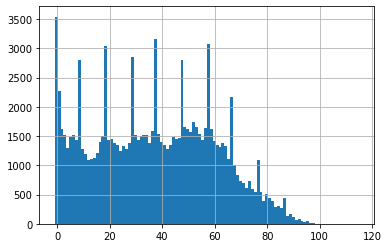

In [60]:
#plotando o histograma de algumas variáveis 
df_consultas['Age'].hist(bins=len(df_consultas['Age'].unique()))

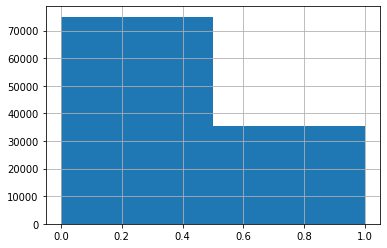

In [61]:
df_consultas['SMS_received'].hist(bins=len(df_consultas['SMS_received'].unique()))

**Quantos valores diferentes encontramos para a vairável dos SMS recebidos (SMS_received)?**

In [64]:
df_consultas['SMS_received'].nunique()

2

In [63]:
df_consultas['SMS_received'].value_counts(normalize=True)

0    0.678974
1    0.321026
Name: SMS_received, dtype: float64

In [26]:
#criando uma nova coluna -> Tempo de espera (diferença entre a data em que a consulta foi agendada e o dia da consulta)
df_consultas.ScheduledDay=pd.to_datetime(df_consultas.ScheduledDay)  #transformando as colunas par o tipo datetime
df_consultas.AppointmentDay=pd.to_datetime(df_consultas.AppointmentDay)

In [27]:
#Encontra a diferença entre o momento da marcação da consulta e o dia da consulta
tempo_espera=df_consultas.ScheduledDay-df_consultas.AppointmentDay

In [28]:
tempo_espera[:10]

0     0 days 18:38:08
1     0 days 16:08:27
2     0 days 16:19:04
3     0 days 17:29:31
4     0 days 16:07:23
5   -2 days +08:36:51
6   -2 days +15:05:12
7   -2 days +15:39:58
8     0 days 08:02:16
9   -2 days +12:48:25
dtype: timedelta64[ns]

In [29]:
df_consultas['AwaitingTime']=tempo_espera.apply(lambda x: x.days) #transforma os valores em dias 

In [30]:
df_consultas.head(8)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,-2
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,-2
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,-2


In [31]:
df_consultas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

**Iniciando o tratamento dos dados**

**Qual é a menor e maior idade, respectivamente, presente no dataset?**

In [51]:
df_consultas['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [32]:
#Encontrando as idades negativas
df_consultas[df_consultas['Age'] < 0]['Age'].value_counts()

-1    1
Name: Age, dtype: int64

In [33]:
#filtrando apenas idades maiores que 0
df_consultas_filtrado=df_consultas[df_consultas['Age']>=0]
df_consultas_filtrado.shape

(110526, 15)

**Quantos valores de idade menores do que 0 existem no dataframe?**

In [34]:
#transformando os tempo de espera para um valor não negativo
df_consultas_filtrado['AwaitingTime'] = df_consultas_filtrado['AwaitingTime'].apply(lambda x: abs(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
df_consultas_filtrado.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


**Qual o tipo de transformação foi utilizada?**

In [36]:
#aplicando a transformação para os dados categóricos (Label Encoder)
categoricas=['Neighbourhood','Gender','No-show']
for coluna in categoricas:
  df_consultas_filtrado[coluna]=pd.Categorical(df_consultas_filtrado[coluna]).codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [37]:
df_consultas_filtrado.head(8)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,39,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,39,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,45,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,54,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,39,0,1,1,0,0,0,0,0
5,9.598513e+13,5626772,0,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,58,0,1,0,0,0,0,0,2
6,7.336882e+14,5630279,0,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,25,0,0,0,0,0,0,1,2
7,3.449833e+12,5630575,0,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,25,0,0,0,0,0,0,1,2


Text(0, 0.5, 'Frequência')

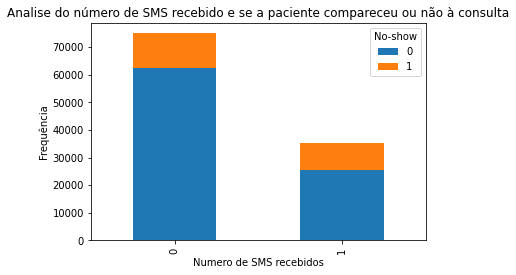

In [38]:
#analisando os SMS enviados e o número de vezes que o paciente compareceu ou não 
sms_x_comparecer = df_consultas_filtrado.groupby(['SMS_received', 'No-show'])['SMS_received'].count().unstack('No-show').fillna(0)
sms_x_comparecer[[0, 1]].plot(kind='bar', stacked=True) 
plt.title('Analise do número de SMS recebido e se a paciente compareceu ou não à consulta') 
plt.xlabel('Numero de SMS recebidos') 
plt.ylabel('Frequência')

In [39]:
sms_x_comparecer

No-show,0,1
SMS_received,,
0,62509,12535
1,25698,9784


**Qual é a proporção de pacientes que receberam o sms e NÃO compareceram?**

In [66]:
# Calculando a proporção de pacientes que receberam o sms e NÃO compareceram (NÃO compareceram e receberam o sms/Todos os pacientes)
proporcao = sms_x_comparecer.iloc[1, 1] / df_consultas_filtrado.shape[0]
# Calculando a proporção de pacientes que receberam o sms e NÃO compareceram (NÃO compareceram e receberam o sms/Todos os pacientes que receberam o sms)
proporcao2 = sms_x_comparecer.iloc[1, 1] / len(df_consultas_filtrado.query('SMS_received == "1"')['SMS_received'])

print('(NÃO compareceram e receberam o sms/Todos os pacientes) =', proporcao, 
      '\n(NÃO compareceram e receberam o sms/Todos os pacientes que receberam o sms) =', proporcao2)

(NÃO compareceram e receberam o sms/Todos os pacientes) = 0.08852215768235529 
(NÃO compareceram e receberam o sms/Todos os pacientes que receberam o sms) = 0.27574544839637


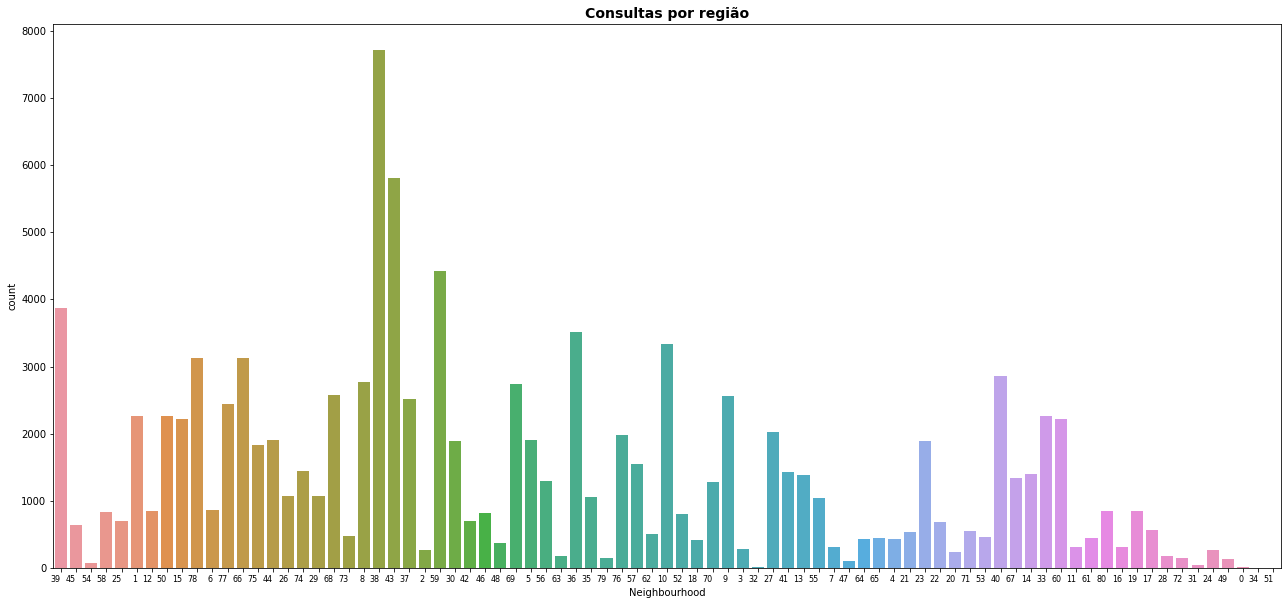

In [40]:
#plotando o número de consultas por região 
regioes = df_consultas_filtrado['Neighbourhood'].unique()
plt.figure(figsize=(22,10))
ax = sns.countplot(x='Neighbourhood', data=df_consultas_filtrado, order=regioes)
ax.set_xticklabels(ax.get_xticklabels(), ha="right", fontsize=8)
plt.title('Consultas por região', fontsize=14, fontweight='bold')
plt.show()

**Qual região possui o maior número de consultas marcadas?**

In [67]:
regioes.max()


80

In [41]:
#selecionando os dados para a construção da previsão
entradas = ['Gender','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','SMS_received','AwaitingTime']
saida=['No-show'] ## Yes o paciente não compareceu / No o paciente compareceu

In [42]:
x=df_consultas_filtrado[entradas]
y=df_consultas_filtrado[saida]

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

In [44]:
x_train.shape

(77368, 9)

In [45]:
#aplicando um modelo de classificação via árvore de decisão
from sklearn.tree import DecisionTreeClassifier
clf_arvore = DecisionTreeClassifier() 
clf_arvore.fit(x_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
#realiza a previsão com os dados
y_previsto = clf_arvore.predict(x_test) 

In [47]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_previsto)
print('Acurácia da àrvore de Decisão: ',acuracia)

Acurácia da àrvore de Decisão:  0.7340913203450148


In [48]:
#contrução da matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_previsto)
print(matriz_confusao)

[[22256  4229]
 [ 4588  2085]]


In [49]:
print(classification_report(y_test,y_previsto))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     26485
           1       0.33      0.31      0.32      6673

    accuracy                           0.73     33158
   macro avg       0.58      0.58      0.58     33158
weighted avg       0.73      0.73      0.73     33158



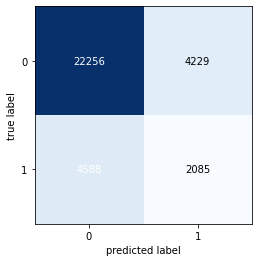

In [50]:
#realiza o plot da matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()